In [ ]:
#question 
#BSSE2301 SOFTWARE ENGINEERING MINI PROJECT 2025


#You have been hired as a data scientist by AgriSmart AI, a company specializing in AI-driven precision agriculture.
# The company collects data from farms using sensors and drones to monitor soil moisture, pH levels, temperature, humidity, and crop conditions to optimize irrigation and fertilization practices. 
# You have received a dataset named climate_action_data.csv containing 913 records across 10 variables, but it contains several issues including missing values, incorrect data formats, erroneous entries labeled as 'error', and duplicate records. 
# Your task is to load this dataset into a Pandas DataFrame and conduct a thorough data inspection to identify the structure, missing values, and data types. 
# Clean the dataset by removing duplicate records, replacing erroneous values with NaN, and handling missing data appropriately by either filling or dropping values based on logical reasoning.
# After cleaning, perform an exploratory data analysis by generating descriptive statistics, visualizing the distribution of numeric variables using histograms, and creating a correlation heatmap to examine the relationships between soil and environmental variables.
# From your analysis, identify which variables most influence fertilizer recommendations, determine the crop type with the highest average soil moisture, and suggest appropriate irrigation adjustments for crops experiencing average temperatures above 30°C. Finally, export your clean dataset as cleaned_precision_agriculture_data.csv and document your insights and recommendations based on the analysis. (10 Marks)


In [1]:
import pandas as pd
import numpy as nm


In [2]:
file =open('climate_action_data.csv')

In [3]:
df =pd.read_csv("climate_action_data.csv")

In [4]:
df.head(10)

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
5,SEN-1005,2025-01-06,20.92,7.08,26.8,66.3,Beans,68.0,27.8,IMG-2005
6,SEN-1006,2025-01-07,14.07,7.77,19.1,51.9,Maize,64.3,10.5,IMG-2006
7,SEN-1007,2025-01-08,70.63,7.74,31.6,43.1,Lettuce,41.0,6.4,IMG-2007
8,SEN-1008,2025-01-09,52.08,6.08,22.0,89.3,Tomatoes,67.8,11.4,IMG-2008
9,SEN-1009,2025-01-10,59.57,4.9,27.2,57.2,Maize,35.2,18.2,IMG-2009


In [5]:
print(df.shape)

(913, 10)


In [6]:
print(df.dtypes)

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object


In [ ]:
#handling bad data

In [7]:
#check for empty rows
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [8]:
for col in ["Soil_Moisture(%)","Soil_pH","Temperature(C)","Humidity(%)","Fertilizer_Recommended(kg/ha)","Irrigation_Recommended(mm)"]:
 if not pd.to_numeric(df[col], errors='coerce').notnull().all():
        print(f"non numeric values found in column:{col}")

non numeric values found in column:Soil_Moisture(%)
non numeric values found in column:Soil_pH
non numeric values found in column:Temperature(C)
non numeric values found in column:Humidity(%)
non numeric values found in column:Fertilizer_Recommended(kg/ha)
non numeric values found in column:Irrigation_Recommended(mm)


In [9]:
# how to handle non-numeric values
for col in ["Soil_Moisture(%)","Soil_pH","Temperature(C)","Humidity(%)","Fertilizer_Recommended(kg/ha)","Irrigation_Recommended(mm)"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
# Fill in empty rows for numeric columns only
numeric_cols = ["Soil_Moisture(%)", "Soil_pH", "Temperature(C)", "Humidity(%)", "Fertilizer_Recommended(kg/ha)", "Irrigation_Recommended(mm)"]
for col in numeric_cols:
	df[col].fillna(df[col].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_14508\3047047067.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [11]:
df.head(30)

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
5,SEN-1005,2025-01-06,20.92,7.08,26.8,66.3,Beans,68.0,27.8,IMG-2005
6,SEN-1006,2025-01-07,14.07,7.77,19.1,51.9,Maize,64.3,10.5,IMG-2006
7,SEN-1007,2025-01-08,70.63,7.74,31.6,43.1,Lettuce,41.0,6.4,IMG-2007
8,SEN-1008,2025-01-09,52.08,6.08,22.0,89.3,Tomatoes,67.8,11.4,IMG-2008
9,SEN-1009,2025-01-10,59.57,4.90,27.2,57.2,Maize,35.2,18.2,IMG-2009


In [12]:
# checking for duplicates
duplicates= df.duplicated()
if duplicates.any():
    print("duplicate values:")
    print(df[duplicates])
else:
    print('no duplicates found')

duplicate values:
    Sensor_ID        Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  \
800  SEN-1008  2025-01-09             52.08     6.08            22.0   
802  SEN-1175  2025-06-25             22.21     5.42            23.4   
803  SEN-1735  2027-01-06             71.40     4.93            24.5   
804  SEN-1242  2025-08-31             74.04     5.62            25.5   
805  SEN-1764  2027-02-04             12.35     7.38            27.8   
..        ...         ...               ...      ...             ...   
908  SEN-1090  2025-04-01             18.37     7.03            21.0   
909  SEN-1201  2025-07-21             15.89     6.40            30.5   
910  SEN-1309  2025-11-06             28.96     5.04            20.5   
911  SEN-1339  2025-12-06             16.85     6.57            19.3   
912  SEN-1050  2025-02-20             77.87     4.73            18.6   

     Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha)  \
800         89.3  Tomatoes                           67.

In [13]:
from datetime import datetime

In [14]:
#how to handle duplicates by filling values
def fill_duplicates(df):
    for col in ["Sensor_ID","Date","Soil_Moisture(%)","Soil_pH","Temperature(C)","Humidity(%)","Crop_Type","Fertilizer_Recommended(kg/ha)","Irrigation_Recommended(mm)","Drone_Image_ID"]:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(method='ffill').fillna(method='bfill')#example for string columns
        else:
            df[col] = df[col].fillna(df[col].mean())
    return df


In [15]:
duplicates= df.duplicated()
if duplicates.any():
    print("duplicate values:")
    print(df[duplicates])
else:
    print('no duplicates found')

duplicate values:
    Sensor_ID        Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  \
800  SEN-1008  2025-01-09             52.08     6.08            22.0   
802  SEN-1175  2025-06-25             22.21     5.42            23.4   
803  SEN-1735  2027-01-06             71.40     4.93            24.5   
804  SEN-1242  2025-08-31             74.04     5.62            25.5   
805  SEN-1764  2027-02-04             12.35     7.38            27.8   
..        ...         ...               ...      ...             ...   
908  SEN-1090  2025-04-01             18.37     7.03            21.0   
909  SEN-1201  2025-07-21             15.89     6.40            30.5   
910  SEN-1309  2025-11-06             28.96     5.04            20.5   
911  SEN-1339  2025-12-06             16.85     6.57            19.3   
912  SEN-1050  2025-02-20             77.87     4.73            18.6   

     Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha)  \
800         89.3  Tomatoes                           67.

In [16]:
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [18]:
# summary statistics with all the columns
print("summary of statistics")
df.describe(include='all')

summary of statistics


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913.000000,913.000000,913.000000,913.000000,909,913.000000,913.000000,913
unique,800,798,NaN,NaN,NaN,NaN,5,NaN,NaN,800
top,SEN-1779,2026-01-02,NaN,NaN,NaN,NaN,Wheat,NaN,NaN,IMG-2779
freq,2,2,NaN,NaN,NaN,NaN,203,NaN,NaN,2
mean,NaN,NaN,44.470099,6.255639,26.404515,60.095374,NaN,87.659692,17.415419,NaN
std,NaN,NaN,20.569993,1.023582,4.917583,17.513308,NaN,34.609613,7.086385,NaN
min,NaN,NaN,10.350000,4.520000,18.000000,30.000000,NaN,30.000000,5.000000,NaN
25%,NaN,NaN,26.610000,5.330000,22.100000,45.900000,NaN,58.500000,11.400000,NaN
50%,NaN,NaN,44.890000,6.280000,26.500000,59.600000,NaN,86.400000,17.415419,NaN
75%,NaN,NaN,62.330000,7.100000,30.600000,75.300000,NaN,117.600000,23.700000,NaN


In [19]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Soil pH distribution')

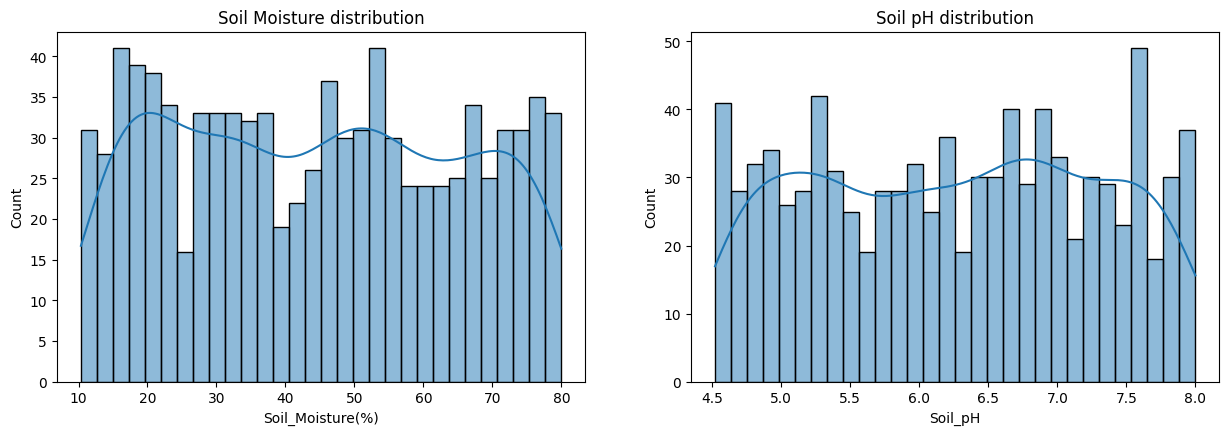

In [20]:
#histogram
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.histplot(df['Soil_Moisture(%)'],bins=30,kde=True)
plt.title('Soil Moisture distribution')

plt.subplot(2,2,2)
sns.histplot(df['Soil_pH'],bins=30,kde=True)
plt.title('Soil pH distribution')

Text(0.5, 1.0, 'Humidity distribution')

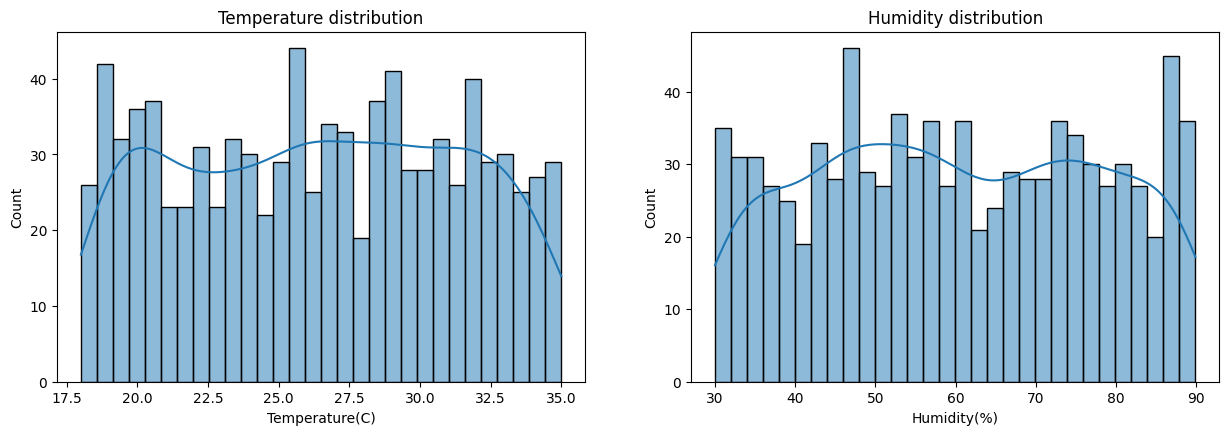

In [21]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.histplot(df['Temperature(C)'],bins=30,kde=True)
plt.title('Temperature distribution')

plt.subplot(2,2,2)
sns.histplot(df['Humidity(%)'],bins=30,kde=True)
plt.title('Humidity distribution')

Text(0.5, 1.0, 'Irrigation Recommended distribution')

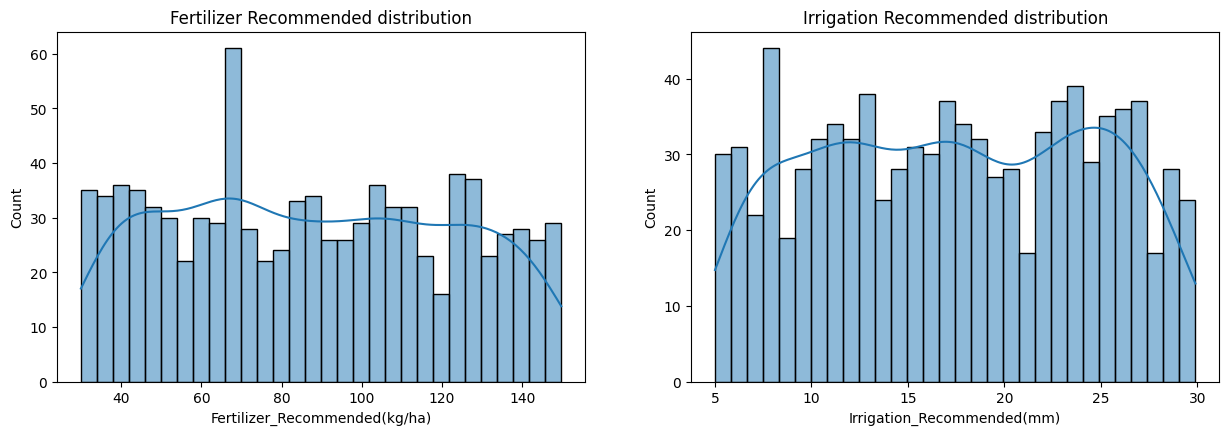

In [22]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.histplot(df['Fertilizer_Recommended(kg/ha)'],bins=30,kde=True)
plt.title('Fertilizer Recommended distribution')

plt.subplot(2,2,2)
sns.histplot(df['Irrigation_Recommended(mm)'],bins=30,kde=True)
plt.title('Irrigation Recommended distribution')

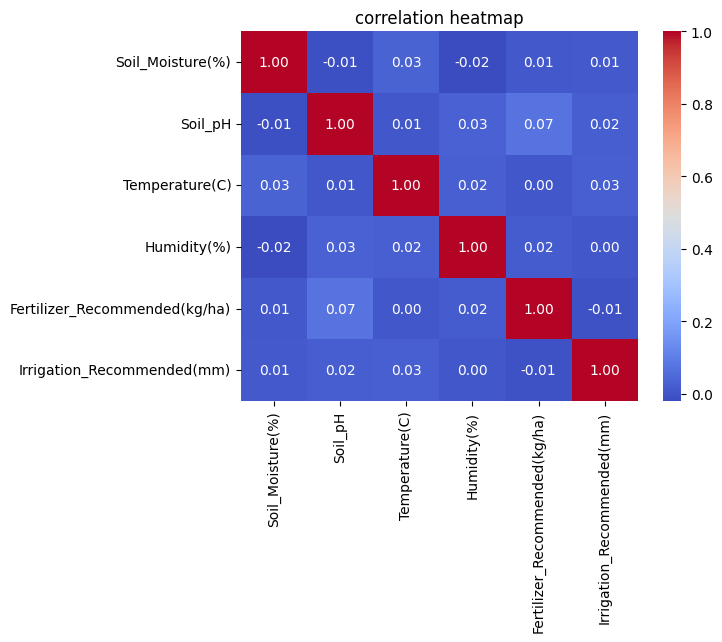

In [28]:
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation heatmap")
plt.show()

In [43]:
# Variables with the most influence on Fertilizer Recommended
print("Variables with the most influence on Fertilizer Recommended:")
print(corr['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False))

Variables with the most influence on Fertilizer Recommended:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.074925
Humidity(%)                      0.017613
Soil_Moisture(%)                 0.010899
Temperature(C)                   0.004035
Irrigation_Recommended(mm)      -0.007858
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [ ]:
# crop type with the highest average soil moisture
highest_soil_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().idxmax()
print(f"The crop type with the highest average soil moisture is: {highest_soil_moisture}")


The crop type with the highest average soil moisture is: Wheat


In [ ]:
# appropriate irrigation adjustments for crops 
high_temp_crops = df[df['Temperature(C)'] > 30]
for crop, irrigation in zip(high_temp_crops['Crop_Type'], high_temp_crops[col]):
    print(f"Consider increasing irrigation for {crop}. Current recommendation: {irrigation}mm")


Consider increasing irrigation for Lettuce. Current recommendation: 6.4mm
Consider increasing irrigation for Maize. Current recommendation: 9.3mm
Consider increasing irrigation for Maize. Current recommendation: 6.6mm
Consider increasing irrigation for Wheat. Current recommendation: 16.3mm
Consider increasing irrigation for Maize. Current recommendation: 15.3mm
Consider increasing irrigation for Tomatoes. Current recommendation: 6.2mm
Consider increasing irrigation for Maize. Current recommendation: 23.7mm
Consider increasing irrigation for Beans. Current recommendation: 12.8mm
Consider increasing irrigation for Lettuce. Current recommendation: 14.4mm
Consider increasing irrigation for Tomatoes. Current recommendation: 19.3mm
Consider increasing irrigation for Maize. Current recommendation: 26.6mm
Consider increasing irrigation for Tomatoes. Current recommendation: 12.0mm
Consider increasing irrigation for Beans. Current recommendation: 23.8mm
Consider increasing irrigation for Maize. 

In [ ]:
# cleaned data to a new CSV file
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)

In [ ]:
# recommendations based on the analysis
recommendations = {
    'Soil Moisture': 'Maintain soil moisture levels between 20-30% for optimal crop growth.',
    'Soil pH': 'Aim for a soil pH between 6.0 and 7.5 for most crops.',
    'Temperature': 'Monitor temperatures closely; consider shade or irrigation if temperatures exceed 30°C.',
    'Humidity': 'Maintain humidity levels around 50-70% to prevent crop stress.',
    'Fertilizer': 'Adjust fertilizer application based on soil nutrient tests; avoid over-fertilization.',
    'Irrigation': 'Implement drip irrigation systems to optimize water usage and reduce waste.'
}
for factor, recommendation in recommendations.items():
    print(f"Recommendation for {factor}: {recommendation}")


Recommendation for Soil Moisture: Maintain soil moisture levels between 20-30% for optimal crop growth.
Recommendation for Soil pH: Aim for a soil pH between 6.0 and 7.5 for most crops.
Recommendation for Temperature: Monitor temperatures closely; consider shade or irrigation if temperatures exceed 30°C.
Recommendation for Humidity: Maintain humidity levels around 50-70% to prevent crop stress.
Recommendation for Fertilizer: Adjust fertilizer application based on soil nutrient tests; avoid over-fertilization.
Recommendation for Irrigation: Implement drip irrigation systems to optimize water usage and reduce waste.
